## M-filter
Frequency-weighting filter according to Southal et al. (2007), p 430-438.

Estimated auditory bandwidth: 150 Hz to 160 kHz

Absolute auditory threshold as obtained in an audiogram does not take into account the flattening of loudness perception when the level increases. Empirical data suggests that a weighting-filter based on an audiogram of the animal would filter too much of the lower frequencies.

Lower and upper hearing frequencies are estimated at -80 dB from lowest hearing threshold. Lower and upper roll-offs of the weighting filter are symmetrical down at 6 dB.

In [79]:
# import the FFT scripts
source("FFT.R")

In [53]:
f <- c(18.75, 37.5, 75, 150, 300, 600, 1200, 2400, 4800, 9600, 19200)/1000
g <- c(-48,-36,-24,-12,0,0,0,0,0,0,0)
filter.table <- data.frame(f,g)
colnames(filter.table) <- c("Frequency.in.kHz", "Gain.in.dB")
filter.table

Frequency.in.kHz,Gain.in.dB
<dbl>,<dbl>
0.01875,-48
0.03750,-36
0.07500,-24
0.15000,-12
0.30000,0
0.60000,0
1.20000,0
2.40000,0
4.80000,0


In [55]:
# sox command
inputfile <- "data/whitenoise.wav"
outputfile <- "data/M.ft_Delphinapterus_leucas.wav"
Q <- 2
command <- sox_command(inputfile, outputfile, filter.table, Q)
command

[1] "sox data/whitenoise.wav data/M.ft_Delphinapterus_leucas.wav equalizer 18.75 2 -48 equalizer 37.5 2 -36 equalizer 75 2 -24 equalizer 150 2 -12 equalizer 300 2 0 equalizer 600 2 0 equalizer 1200 2 0 equalizer 2400 2 0 equalizer 4800 2 0 equalizer 9600 2 0 equalizer 19200 2 0"

## Testing the filter
The filter was tested by applying it to a file containing 1 second of white noise. The result can be checked visually in the following FFT plots.

Generate white noise and save it to file
`sox -n data/whitenoise.wav synth 1 whitenoise`

Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 10 rows containing missing values (geom_path).”
Warning message:
“Removed 26 rows containing missing values (geom_smooth).”


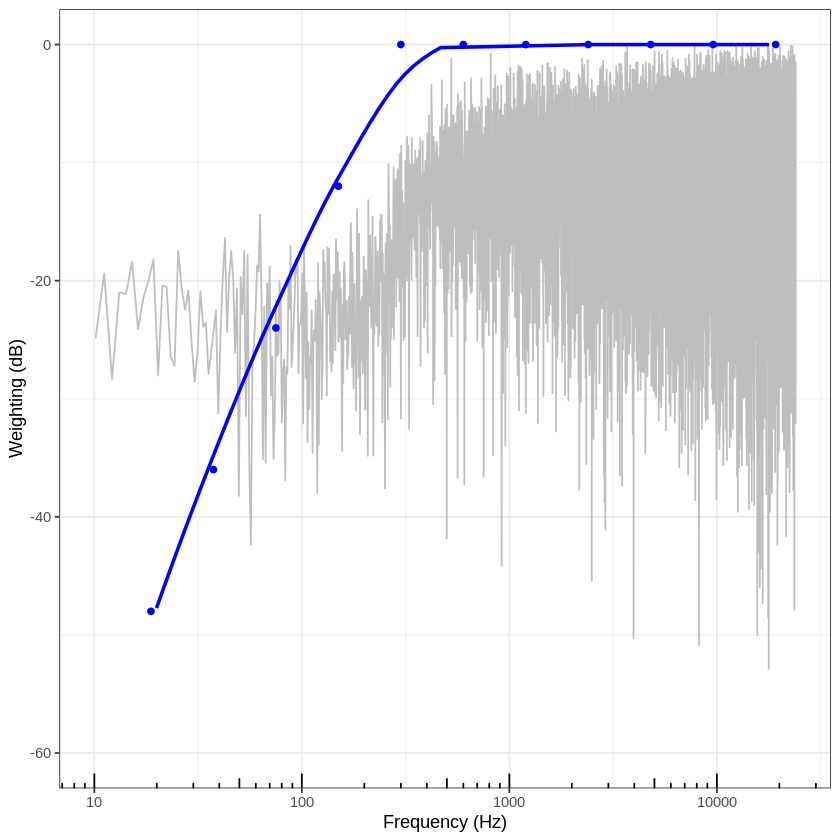

In [80]:
# compute FFT for the input file
sndObj <- readWave(outputfile)
fft <- comp_fft(sndObj)

# plot the filtered data and the filter values
plot_filter_fft(fft, filter.table)


## References
Southall, B.L., Bowles, A.E., Ellison, W.T., Finneran, J.J., Gentry, R.L., Greene Jr, C.R., Kastak, D., Ketten, D.R., Miller, J.H., Nachtigall, P.E. and Richardson, W.J., 2007. Overview. Aquatic mammals, 33(4), p.411.